In [24]:
import random
import math

class s_neuron ():
    def __init__ (self, N):
        self.N = N
        self.W = [random.random() for _ in range(self.N)]
        w2 = math.sqrt(sum([ w*w for w in self.W]))
        self.W = [x/w2 for x in self.W]
        self.A = random.random()
        self.A = .7
        self.R = math.tan(random.random()*1.5)
        self.R = 1.5
        
    def process (self, X):
        y1 = sum([X[i]*X[i] for i in range(self.N)])
        y2 = sum([X[i]*self.W[i] for i in range(self.N)])
        y = - (y1 - 2*(self.A + self.R)*y2 + self.A*self.A + 2*self.A*self.R)
        return self.sigmoid(y)
    
    
    def sigmoid(self,x):
        #return - 1 / (1 + math.exp(-x)) + .5
        return  1 / (1 + math.exp(-x)) 
        
    def print (self):
        print ("N:",self.N, "A:",self.A,"R:",self.R,"W:",self.W)
        
    def train(self, X, y):
        
        ye = self.process(X)
        
        dA = 2*(ye - y)*(-2*sum([X[i]*self.W[i] for i in range(self.N)]) + 2*self.A + 2*self.R)
        dR = 2*(ye - y)*(-2*sum([X[i]*self.W[i] for i in range(self.N)]) + 2*self.A )
        dW = [0 for i in range(self.N)]
        for i in range(self.N):
            dW[i] = 2*(ye - y)*(- 2*(self.A + self.R)*X[i])
        
        self.A = self.A + 0.003*dA
        self.R = self.R + 0.003*dR
        for i in range(self.N):
            self.W[i] = self.W[i] + 0.001*dW[i]
        
        w2 = math.sqrt(sum([ w*w for w in self.W]))
        self.W = [x/w2 for x in self.W]
        
    def evalnet (self, T):
        Serror = 0
        for i in range(len(T)):
            y =self.process(T[i][0])
            Serror = Serror + (y - T[i][1])**2
            
        return (Serror)
        

            

N: 2 A: 0.7 R: 1.5 W: [0.9594066038103622, 0.2820265387602141]
0.0 : -0.4302152171234199
0.5 : -0.2635966051596269
1.0 : 1.1102230246251565e-16
1.5 : 0.21656781455771446
2.0 : 0.3334113864245403
2.5 : 0.3856947637909995
3.0 : 0.4037844582893071
3.5 : 0.39912137726994346
4.0 : 0.3687555305614768
4.5 : 0.293720608245328
5.0 : 0.13645254028156695
5.5 : -0.11597530191812455
6.0 : -0.3519528019683106
6.5 : -0.46347325509487725
7.0 : -0.4935678915330812
7.5 : -0.4991355048551873
8.0 : -0.4999094936469659
8.5 : -0.4999925887201281
9.0 : -0.4999995250234843
9.5 : -0.4999999761742765


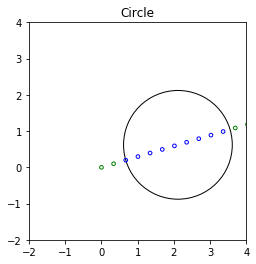

In [36]:
import matplotlib.pyplot as plt 
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 

sn = s_neuron(2)
sn.print()
cc = plt.Circle( ((sn.A+sn.R)*sn.W[0], (sn.A+sn.R)*sn.W[1] ), 
                                      sn.R , 
                                      fill = False )   
axes.add_artist( cc) 


for a in range(20):
    X = [a*.5*sn.A*w for w in sn.W]
    print (a*.5,":",sn.process(X))
    cl = 'blue' if sn.process(X) > 0 else 'green'
    cc = plt.Circle( (X[0], X[1] ),    .05 , fill = False, color = cl )   
    axes.add_artist( cc) 
    

plt.xlim( -2 ,4 ) 
plt.ylim( -2 , 4) 
plt.title( 'Circle' ) 
plt.show() 


N: 2 A: 0.7 R: 1.5 W: [0.38542339740504866, 0.9227398358869904]
red
red
red
blue


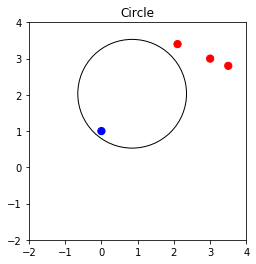

N: 2 A: 1.457118194631457 R: 6.12781088254159 W: [0.7155370084345186, 0.6985748274598645]
red
red
red
blue


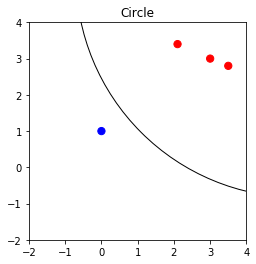

In [63]:
import matplotlib.pyplot as plt 
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
T = [([3,3],-1),([3.5,2.8],-1),([2.1,3.4],-1),([0,1],1)]
     
sn = s_neuron(2)
sn.print()
cc = plt.Circle( ((sn.A+sn.R)*sn.W[0], (sn.A+sn.R)*sn.W[1] ), sn.R ,fill = False )   
axes.add_artist( cc)    
for i in range(len(T)):
    cl = 'blue' if T[i][1] > 0 else 'red'
    print (cl)
    cc = plt.Circle( (T[i][0][0], T[i][0][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)        

plt.xlim( -2 ,4 ) 
plt.ylim( -2 , 4) 
plt.title( 'Circle' ) 
plt.show()

for _ in range(10):
    for i in range(len(T)):
        sn.train([T[i][0][0], T[i][0][1]], T[i][1])


sn.print()
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
cc = plt.Circle( ((sn.A+sn.R)*sn.W[0], (sn.A+sn.R)*sn.W[1] ), sn.R ,fill = False )   
axes.add_artist( cc)    
for i in range(len(T)):
    cl = 'blue' if T[i][1] > 0 else 'red'
    print (cl)
    cc = plt.Circle( (T[i][0][0], T[i][0][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)        

plt.xlim( -2 ,4 ) 
plt.ylim( -2 , 4) 
plt.title( 'Circle' ) 
plt.show()


N: 2 A: 0.7 R: 1.5 W: [0.8231555759885589, 0.5678159012558065]
blue
blue
blue
red
red


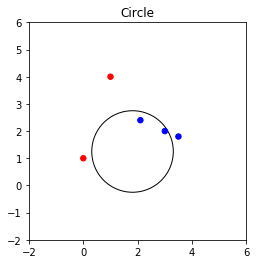

N: 2 A: 0.7718061660541483 R: 1.6249909994429284 W: [0.8281436313980939, 0.5605159460486188]
blue
blue
blue
red
red


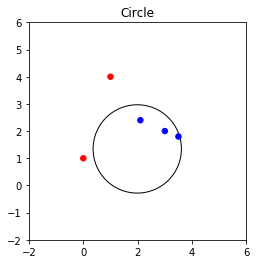

N: 2 A: 0.8164025766372864 R: 1.7033519484336668 W: [0.8318358400865901, 0.5550217429501633]
blue
blue
blue
red
red


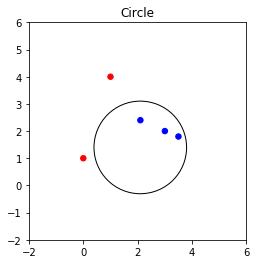

N: 2 A: 0.8478682762307462 R: 1.7579024935403114 W: [0.8347013181550015, 0.5507029230631549]
blue
blue
blue
red
red


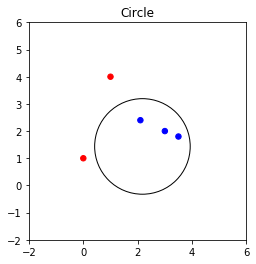

N: 2 A: 0.8721164799483491 R: 1.7990921381770602 W: [0.8370627541862914, 0.5471068867726491]
blue
blue
blue
red
red


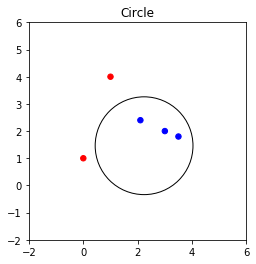

N: 2 A: 0.891890939964865 R: 1.8319774539002545 W: [0.8390962162984916, 0.5439830326338818]
blue
blue
blue
red
red


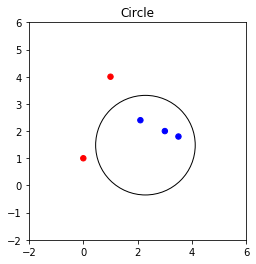

N: 2 A: 0.9086338607351646 R: 1.8592739934343354 W: [0.8409009575937307, 0.5411890423114151]
blue
blue
blue
red
red


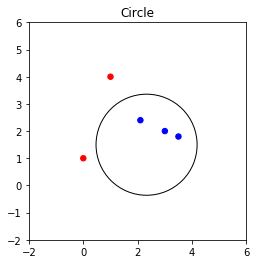

N: 2 A: 0.923185002794199 R: 1.8825789895838085 W: [0.8425367041650348, 0.5386389348484945]
blue
blue
blue
red
red


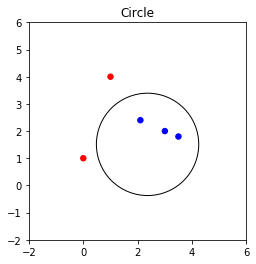

N: 2 A: 0.936073565995202 R: 1.9029020324758448 W: [0.8440416561749915, 0.5362776171362902]
blue
blue
blue
red
red


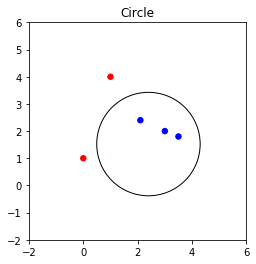

N: 2 A: 0.9476541012570822 R: 1.9209183846519557 W: [0.8454415394664264, 0.5340679763331995]
blue
blue
blue
red
red


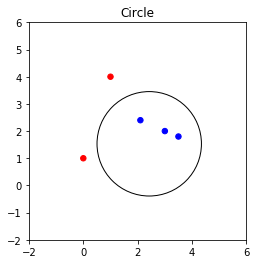

N: 2 A: 0.9581758800755559 R: 1.9371004531991904 W: [0.8467544417007694, 0.5319839428591979]
blue
blue
blue
red
red


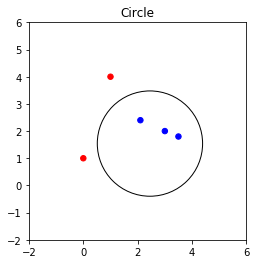

In [26]:
import matplotlib.pyplot as plt 
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
T = [([3,2],1),([3.5,1.8],1),([2.1,2.4],1),([0,1],0), ([1,4],0)]
     
sn = s_neuron(2)
sn.print()
cc = plt.Circle( ((sn.A+sn.R)*sn.W[0], (sn.A+sn.R)*sn.W[1] ), sn.R ,fill = False )   
axes.add_artist( cc)    
for i in range(len(T)):
    cl = 'blue' if T[i][1] > 0 else 'red'
    print (cl)
    cc = plt.Circle( (T[i][0][0], T[i][0][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)        

plt.xlim( -2 ,6 ) 
plt.ylim( -2 , 6) 
plt.title( 'Circle' ) 
plt.show()

for _ in range(10):
    for _ in range(3):
        for i in range(len(T)):
            sn.train([T[i][0][0], T[i][0][1]], T[i][1])


    sn.print()
    figure, axes = plt.subplots()
    axes.set_aspect( 1 ) 
    cc = plt.Circle( ((sn.A+sn.R)*sn.W[0], (sn.A+sn.R)*sn.W[1] ), sn.R ,fill = False )   
    axes.add_artist( cc)    
    for i in range(len(T)):
        cl = 'blue' if T[i][1] > 0 else 'red'
        print (cl)
        cc = plt.Circle( (T[i][0][0], T[i][0][1] ), 0.1 ,fill = True, color =cl )   
        axes.add_artist( cc)        

    plt.xlim( -2 ,6 ) 
    plt.ylim( -2 , 6) 
    plt.title( 'Circle' ) 
    plt.show()


N: 2 A: 2.1 R: 4.0 W: [7.388449492060517e-07, 0.9999999999997271]
0 : ([3, 2], 1) 0.9999087139844651
1 : ([3.5, 1.8], 1) 0.999982644154374
2 : ([2.1, 2.4], 1) 0.9923750312807652
3 : ([0, 1], 0) 3.021559402616347e-07
4 : ([1, 4], 0) 0.006218839221713327
_____________
N: 2 A: 2.0 R: 3.8000000000000003 W: [0.8944271909999159, 0.4472135954999579]
sumerror= 9.682274368813694e-05


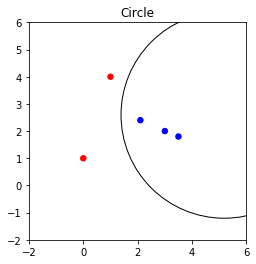

In [19]:
import matplotlib.pyplot as plt 
figure, axes = plt.subplots()
axes.set_aspect( 1 ) 
T = [([3,2],1),([3.5,1.8],1),([2.1,2.4],1),([0,1],0), ([1,4],0)]
     
sn = s_neuron(2)

Semin = 10000
for a in range(20):
    sn.A = 0.2 + a*0.1
    for r in range(30):
        sn.R = 0.2 + a*0.2
        for w0 in range(20):
            sn.W[0] = 0.2 + w0*0.2
            for w1 in range(20):
                sn.W[1] = 0.2 + w1*0.2
                w2 = math.sqrt(sum([ w*w for w in sn.W]))
                sn.W = [x/w2 for x in sn.W]
                
                Se = sn.evalnet(T)
        
                if Se < Semin:
                    MA = sn.A
                    MR = sn.R
                    MW0 = sn.W[0]
                    MW1 = sn.W[1]
                    Semin = Se
                    


sn.print()
sn.A = MA
sn.R = MR
sn.W[0] = MW0
sn.W[1] = MW1

cc = plt.Circle( ((sn.A+sn.R)*sn.W[0], (sn.A+sn.R)*sn.W[1] ), sn.R ,fill = False )   
axes.add_artist( cc)    
for i in range(len(T)):
    cl = 'blue' if T[i][1] > 0 else 'red'
    cc = plt.Circle( (T[i][0][0], T[i][0][1] ), 0.1 ,fill = True, color =cl )   
    axes.add_artist( cc)        
    print(i,":", T[i], sn.process(T[i][0]))

print ("_____________")
sn.print()
print ("sumerror=", Semin)
plt.xlim( -2 ,6 ) 
plt.ylim( -2 , 6) 
plt.title( 'Circle' ) 
plt.show()
